# Que es HuggingFace?

Es una compañía de tecnología enfocada en el desarrollo de herramientas de inteligencia artificial (IA), particularmente en el campo del procesamiento del lenguaje natural (NLP). Es más conocida por su biblioteca *transformers*, que proporciona una amplia gama de modelos de IA preentrenados y herramientas para trabajar con ellos.

## Características y Capacidades

1. **Modelos Preentrenados**: Ofrece acceso a una amplia gama de modelos de lenguaje preentrenados, como BERT, GPT, T5, RoBERTa, y muchos más. Estos modelos han sido entrenados en grandes conjuntos de datos y pueden ser utilizados para una variedad de tareas de NLP.

2. **Tareas de NLP**: Soporta una amplia gama de tareas de NLP, incluyendo clasificación de texto, respuesta a preguntas, resumen de texto, traducción automática, generación de texto, y más.

3. **Facilidad de Uso**: La biblioteca está diseñada para ser intuitiva, lo que permite a los investigadores y desarrolladores utilizar modelos avanzados de NLP con unas pocas líneas de código. Objetos Pipeline.

4. **Comunidad y Colaboración**: Cuenta con una comunidad activa y en crecimiento. Los usuarios pueden compartir sus propios modelos entrenados en el hub de modelos de Hugging Face, facilitando la colaboración y el intercambio de conocimientos.

https://huggingface.co/learn

5. **Interoperabilidad**: Hugging Face es compatible con populares frameworks de aprendizaje profundo como PyTorch y TensorFlow, lo que facilita su integración en flujos de trabajo existentes.

https://huggingface.co/

Al ser una biblioteca tan amplia la facilidad de uso radica principalmente en la utilización de objetos de alto nivel. El objeto `pipeline` es una herramienta extremadamente útil y una de las características centrales de la biblioteca. Su función principal es facilitar el uso de modelos de procesamiento de lenguaje natural (NLP) y otras tareas



In [ ]:
!pip install transformers

## Analisis de Sentimiento

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

C:\Users\Propietario\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

Un primer mensaje de advertencia fue que se está utilizando un modelo genérico. Y vemos que los resultados para español no son muy buenos. Con lo cual, podemos buscar en la página directamente que modelos son para dicha tarea, en español

In [2]:
classifier([
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "Es un hermoso día soleado"
])

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'POSITIVE', 'score': 0.7457746267318726}]

In [3]:
cls_español = pipeline("sentiment-analysis", model='finiteautomata/beto-sentiment-analysis')

In [4]:
cls_español([
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "Es un hermoso día soleado"
])

[{'label': 'NEU', 'score': 0.9952906370162964},
 {'label': 'POS', 'score': 0.9980528354644775},
 {'label': 'POS', 'score': 0.998630940914154}]

## Clasificar "cualquier" tema - Zero Shot Classification

Este tipo de enfoques permite a un modelo realizar tareas de clasificación para las cuales no fue específicamente entrenado. Es especialmente útil en situaciones donde no dispones de datos etiquetados para entrenar un modelo en una tarea de clasificación específica.

En la clasificación tradicional, un modelo se entrena con un conjunto de datos específico que contiene ejemplos de cada clase. En contraste, la clasificación "Zero-Shot" permite al modelo inferir categorías o clases que nunca vio durante su entrenamiento.

Zero Shot Classification utiliza el NLI (Natural language inference).

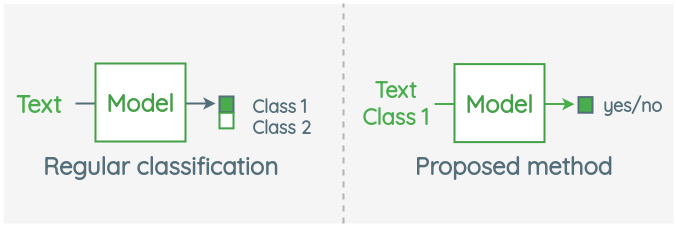

**Funcionamiento**

En un escenario de clasificación "Zero-Shot", se le presenta al modelo un texto y un conjunto de posibles categorías o etiquetas. Estas etiquetas pueden ser definidas por el usuario y no necesitan haber sido vistas por el modelo durante su entrenamiento. El modelo recive como entrada el texto y la clase y devuelve una probabilidad de que estos dos elementos tengan relación.

**Ventajas**

* *Flexibilidad*: Puedes clasificar textos en categorías que son específicas para tu aplicación sin necesidad de recolectar y etiquetar un gran conjunto de datos para cada nueva categoría.

* *Escalabilidad*: Permite aplicar modelos de clasificación a un rango muy amplio de tareas sin incurrir en el costo y el tiempo que implica el entrenamiento de modelos específicos para cada tarea.

**Limitaciones**

* *Precisión*: Aunque poderosa, la clasificación "Zero-Shot" puede no ser tan precisa como un modelo entrenado específicamente para una tarea dada, especialmente en contextos muy especializados o con lenguaje técnico.

* *Dependencia del Contexto y el Lenguaje*: El rendimiento puede variar considerablemente dependiendo del contexto y la claridad del lenguaje utilizado en las etiquetas y el texto.

In [5]:
cls_zero_shot = pipeline("zero-shot-classification", model = "Recognai/bert-base-spanish-wwm-cased-xnli")

In [6]:
texto = """No es el vecino el que elige el alcalde, es el alcalde el que elige al alcalde"""

In [8]:
texto = "me gusta los catalanes porque hacen cosas"

In [10]:
texto = "haré todo lo que pueda y un poco más de lo que pueda si es que eso es posible, y haré todo lo posible e incluso lo imposible si también lo imposible es posible."

In [11]:
cls_zero_shot(texto, candidate_labels = ['política','filosofía','astronomía','humor'])

{'sequence': 'haré todo lo que pueda y un poco más de lo que pueda si es que eso es posible, y haré todo lo posible e incluso lo imposible si también lo imposible es posible.',
 'labels': ['humor', 'filosofía', 'política', 'astronomía'],
 'scores': [0.4021712839603424,
  0.2281806915998459,
  0.212372288107872,
  0.15727576613426208]}

La nomenclatura utilizada para los nombres de los modelos en la biblioteca de Hugging Face Transformers y en general en el campo del procesamiento del lenguaje natural (NLP) suele seguir un patrón que describe las características clave del modelo. Algunos, por ejemplo son:

* *base*: Indica el tamaño del modelo. BERT y otros modelos suelen venir en variantes como "base" y "large", donde "base" es más pequeño y rápido, pero potencialmente menos preciso que "large".

* *spanish*: Esto denota el idioma en el que el modelo ha sido entrenado o para el que está optimizado. En este caso, el modelo está especializado en español.

* *cased*: Indica que el modelo tiene en cuenta las mayúsculas y minúsculas. "Cased" significa que diferencia entre mayúsculas y minúsculas, mientras que "uncased" significaría que no lo hace.

### Pysentimiento: A transformer-based Sentiment Analysis library for Spanish

Vamos a ver cómo usar [pysentimiento](https://github.com/finiteautomata/pysentimiento/), una librería de análisis de sentimiento en Español.

`pysentimiento` es un pequeño wrapper sobre modelos pre-entrenados de [transformers](https://github.com/huggingface/transformers), usando la implementación de BERT en Español, [BETO](https://github.com/dccuchile/beto) y los datos de la versión 2020 del [Taller de Análisis de Sentimiento (TASS) de la Sociedad Española de Procesamiento de Lenguaje Natural (SEPLN)](http://tass.sepln.org/2020/?page_id=74)

Primero, instalamos la librería

In [1]:
# !pip install pysentimiento

In [1]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

C:\Users\Propietario\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
analyzer.predict('Esto es un dia muy lindo')

AnalyzerOutput(output=POS, probas={POS: 0.968, NEU: 0.029, NEG: 0.003})

In [4]:
analyzer.predict('Esto no me parece realmente muy bueno, es mas no me gusta para nada, aunque me gusta un poquito')

AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.030, POS: 0.005})

In [5]:
from pysentimiento.preprocessing import preprocess_tweet

In [6]:
# Replaces user handles and URLs by special tokens
preprocess_tweet("@perezjotaeme debería cambiar esto http://bit.ly/sarasa") # "@usuario debería cambiar esto url"


'@usuario debería cambiar esto url'

In [10]:
# Shortens repeated characters
preprocess_tweet("no entiendo naaaaaaaadaaaaaaaa", shorten=2)


'no entiendo naadaa'

In [11]:
# Normalizes laughters
preprocess_tweet("jajajajaajjajaajajaja no lo puedo creer ajajaj")


'jaja no lo puedo creer jaja'

In [14]:
# Handles hashtags
preprocess_tweet("esto es #UnaGenialidad")


'esto es hashtag una genialidad'

In [15]:
# Handles emojis
preprocess_tweet("🎉🎉", lang="en")

'emoji party popper emoji  emoji party popper emoji'

In [16]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [17]:
hate_speech_analyzer.predict("Esto es una mierda pero no es odio")

AnalyzerOutput(output=[], probas={hateful: 0.020, targeted: 0.006, aggressive: 0.016})

In [18]:
hate_speech_analyzer.predict("los inmigrantes deben ser aniquilados")

AnalyzerOutput(output=['hateful', 'aggressive'], probas={hateful: 0.959, targeted: 0.017, aggressive: 0.759})